In [3]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [4]:
from google import colab
colab.drive.mount("/content/drive")

Mounted at /content/drive


In [66]:
data = pd.read_csv('/content/drive/MyDrive/portfolio/after_cohort_p_data/user_data.csv', index_col = 0)

In [68]:
weekday = [dt for dt in data['ACT_DATE'].drop_duplicates().tolist() if date(int(dt[0:4]), int(dt[5:7]), int(dt[8:10])).weekday() <5]

In [69]:
weekday_data = data[data['ACT_DATE'].isin(weekday)].copy(deep=True)

In [70]:
weekday_data

,INTEREST_FIELD,ACT_DATE
USER_SEQ,,
1,Portfolio,2021-11-15
2,Portfolio,2021-11-15
3,Portfolio,2021-11-15
4,Portfolio,2021-11-15
5,Portfolio,2021-11-15
...,...,...
496,Portfolio,2021-11-19
497,Portfolio,2021-11-19
498,Portfolio,2021-11-19


In [71]:
weekday_list = weekday_data['ACT_DATE'].drop_duplicates().to_list()[0:5]

In [72]:
weekday_list

['2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19']

In [73]:
weekday_data = weekday_data[weekday_data['INTEREST_FIELD']=='Portfolio'].copy(deep=True)

In [74]:
weekday_data
weekday_list

['2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19']

In [75]:
weekday_data = weekday_data[weekday_data['ACT_DATE'].isin(weekday_list)].copy(deep=True)

In [76]:
weekday_data.reset_index(inplace=True)

In [77]:
weekday_data = weekday_data[['USER_SEQ','ACT_DATE']].drop_duplicates()

In [78]:
weekday_data.set_index('USER_SEQ',inplace=True)

In [79]:
weekday_data

,ACT_DATE
USER_SEQ,
1,2021-11-15
2,2021-11-15
3,2021-11-15
4,2021-11-15
5,2021-11-15
...,...
496,2021-11-19
497,2021-11-19
498,2021-11-19


In [80]:
weekday_data['CohortGroup'] = weekday_data.groupby(level=0)['ACT_DATE'].min()

In [81]:
weekday_data.query("USER_SEQ == 1")

,ACT_DATE,CohortGroup
USER_SEQ,,
1,2021-11-15,2021-11-15
1,2021-11-16,2021-11-15
1,2021-11-17,2021-11-15
1,2021-11-18,2021-11-15
1,2021-11-19,2021-11-15


In [82]:
weekday_data.reset_index(inplace=True)

In [83]:
grouped = weekday_data.groupby(['CohortGroup', 'ACT_DATE'])

In [84]:
cohorts = grouped.agg({'USER_SEQ': pd.Series.nunique})

In [85]:
cohorts.rename(columns={'USER_SEQ': 'TotalUsers',
                        }, inplace=True)
cohorts.head()

TotalUsers
CohortGroup ACT_DATE              
2021-11-15  2021-11-15         100
            2021-11-16          45
            2021-11-17          35
            2021-11-18          25
            2021-11-19          23

In [86]:
def cohort_period(data):
  data['CohortPeriod'] = np.arange(len(data)) + 1
  return data

In [87]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [88]:
cohorts

TotalUsers  CohortPeriod
CohortGroup ACT_DATE                            
2021-11-15  2021-11-15         100             1
            2021-11-16          45             2
            2021-11-17          35             3
            2021-11-18          25             4
            2021-11-19          23             5
2021-11-16  2021-11-16         100             1
            2021-11-17          50             2
            2021-11-18          45             3
            2021-11-19          30             4
2021-11-17  2021-11-17         100             1
            2021-11-18          55             2
            2021-11-19          50             3
2021-11-18  2021-11-18         100             1
            2021-11-19          60             2
2021-11-19  2021-11-19         100             1

In [89]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

In [90]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2021-11-15    100
2021-11-16    100
2021-11-17    100
2021-11-18    100
2021-11-19    100
Name: TotalUsers, dtype: int64

In [91]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
CohortPeriod,,,,,
1,1.00,1.00,1.00,1.0,1.0
2,0.45,0.50,0.55,0.6,NaN
3,0.35,0.45,0.50,NaN,NaN
4,0.25,0.30,NaN,NaN,NaN
5,0.23,NaN,NaN,NaN,NaN


In [92]:
user_retention

CohortGroup,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19
CohortPeriod,,,,,
1,1.00,1.00,1.00,1.0,1.0
2,0.45,0.50,0.55,0.6,NaN
3,0.35,0.45,0.50,NaN,NaN
4,0.25,0.30,NaN,NaN,NaN
5,0.23,NaN,NaN,NaN,NaN


In [95]:
act_date_list = data['ACT_DATE'].drop_duplicates().to_list()

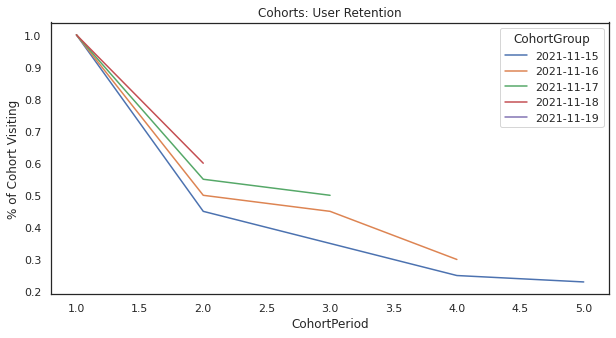

In [97]:
user_retention[act_date_list].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.ylabel('% of Cohort Visiting');

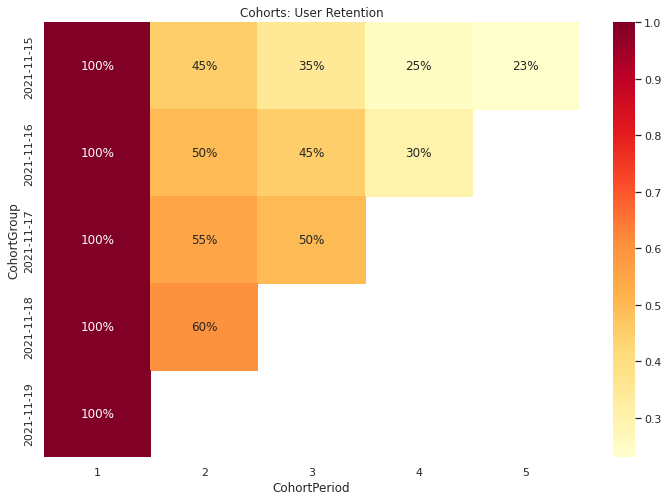

In [98]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, cmap="YlOrRd", fmt='.0%');